In [2]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
titan = pd.read_csv("train.csv")
titan1 = titan.copy(deep = True)
titan2 = titan.copy(deep = True)

In [35]:
# 3.1) How many passengers were travelling by first class?
a = titan[titan['Pclass'] == 1].Pclass.sum()
#a

216 passengers were travelling by first class

In [36]:
# 3.2) What is the most popular female name on board?
a = titan[titan['Sex'] == 'female'].Name
b = a[a.str.match('.* [(].*')].str.split('[(]').str[1].str.split(' ').str[0].str.replace('\)|\"',"").value_counts()
c =a[a.str.match('(?!.* [(].*)')].str.split('.').str[1].str.split(' ').str[1].value_counts()
d = b.append(c)
d = d.groupby(lambda x:x).sum().sort_values(ascending = False).drop('Mrs')
#d

The most popular names were Mary and Anna

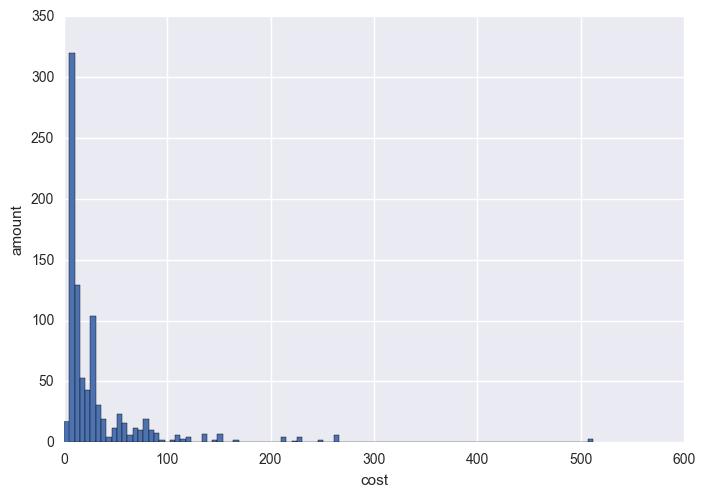

In [37]:
# 3.3) How does the ticket cost vary?
titan.Fare.hist(bins = 100)
plt.xlabel('cost')
plt.ylabel('amount')
plt.show()

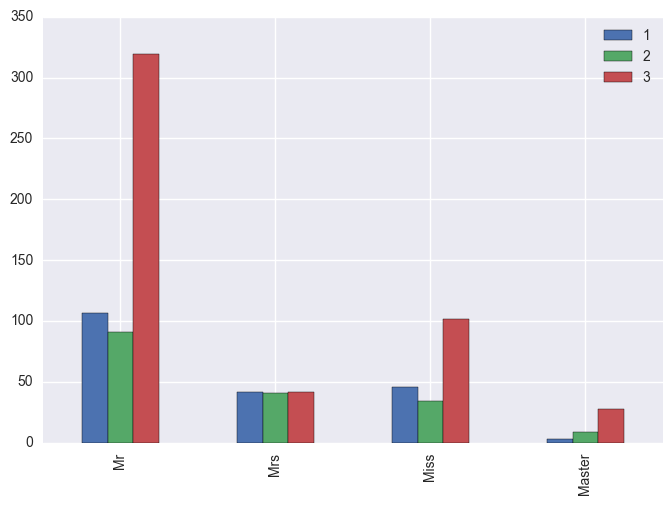

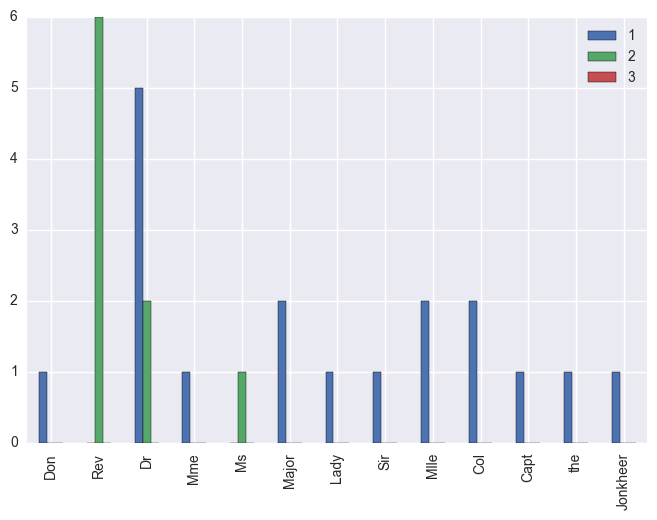

In [33]:
# 3.4) What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
a = titan.Name.str.split('.').str[0].str.split(',').str[1].str.split().str[0]
titan1.Name = a
names = titan1.Name.unique()
c = pd.DataFrame()
for key in names:
    a = titan1[titan1.Name == key].Pclass.value_counts().sort_index().to_frame(name = key)
    c = pd.concat([c,a],axis = 1)
c.iloc[:,0:4].transpose().plot.bar()
c.iloc[:,4:c.shape[1]].transpose().plot.bar()
plt.show()

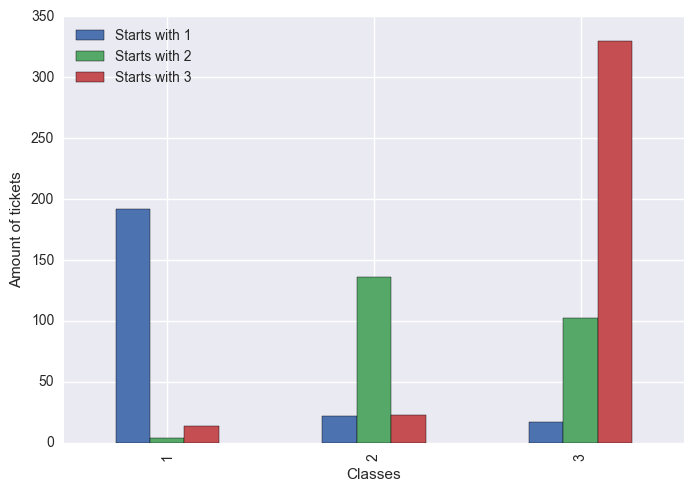

In [39]:
# 3.5) Are there any dependencies between a class and a ticket number?
a = titan[['Pclass','Ticket']]
c = pd.DataFrame(index = range(1,4),columns = ('Starts with 1','Starts with 2','Starts with 3'))
for i in range(1,4):
    for j in range(1,4):
        b = a[a.Pclass == i]
        b = b[b.Ticket.str.match('.* '+str(j)+'.*|^'+str(j))]
        c.set_value(i-1,j-1,len(b),takeable = True)
c.plot.bar()
plt.xlabel('Classes')
plt.ylabel('Amount of tickets')
plt.show()

I found that each class has most of tickets'' names starting with the number of it.

In [40]:
# 3.6) What part of passengers was able to survive?
a = round(100 * titan.Survived.sum()/len(titan.Survived), 1)
#a

38.4% passengers survived after the crash

In [41]:
# 3.7) Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
titan[['SibSp','Parch']].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


There is some correlation between these two charachteristics, but not really strong.

In [43]:
#4
a = len(titan[(titan.Age >= 18) & (titan.Parch > 0)]) #the amount of the parents (vague charachteristic)
b = len(titan[(titan.Age < 18) & (titan.Parch == 0)]) #the amount of the kids aboard
c = titan[(titan.Sex == 'male') & (titan.SibSp > 1)].SibSp.sum() #the amount of siblings of male people aboard
d = titan[(titan.Sex == 'female') & (titan.SibSp > 1)].SibSp.sum() #the amount of siblings of female people aboard
#print (a,b,c,d)

We can conclude that there are probably equal number of parents and siblings of female persons aboard (it's just a small note, it might not be right, because both columns are ambigious, they can denote different relatives.

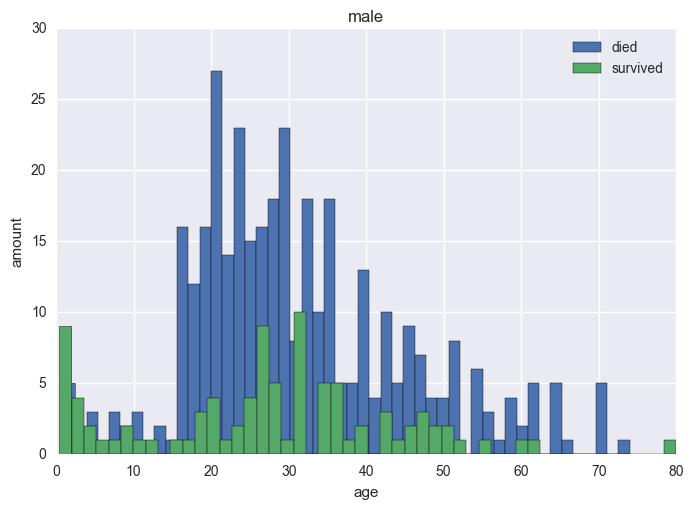

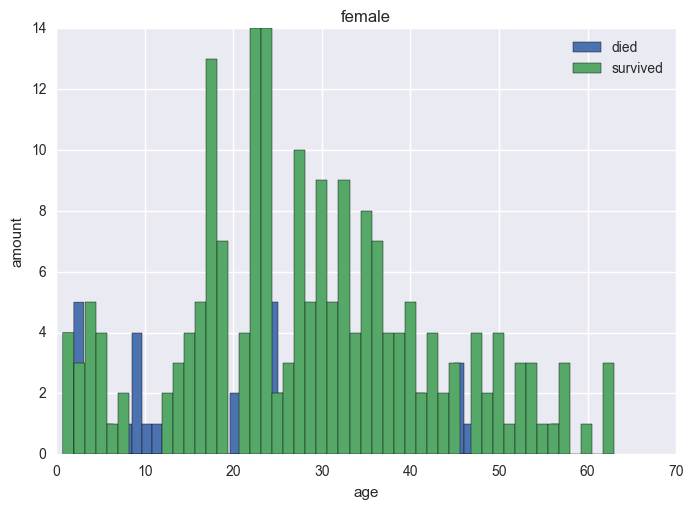

In [44]:
#4
a = titan[titan.Sex == 'male']
b = titan[titan.Sex == 'female']
sex = titan.Sex.unique()
for s in sex:
    a = titan[titan.Sex == s]
    a[a.Survived == 0].Age.hist(bins = 50, label = 'died', stacked = True)
    a[a.Survived == 1].Age.hist(bins = 50, label = 'survived', stacked = True)
    plt.legend(loc='upper right')
    plt.xlabel('age')
    plt.ylabel('amount')
    plt.title(s)
    plt.show()

From this we can conclude that middle-aged men died much more than middle-aged women    

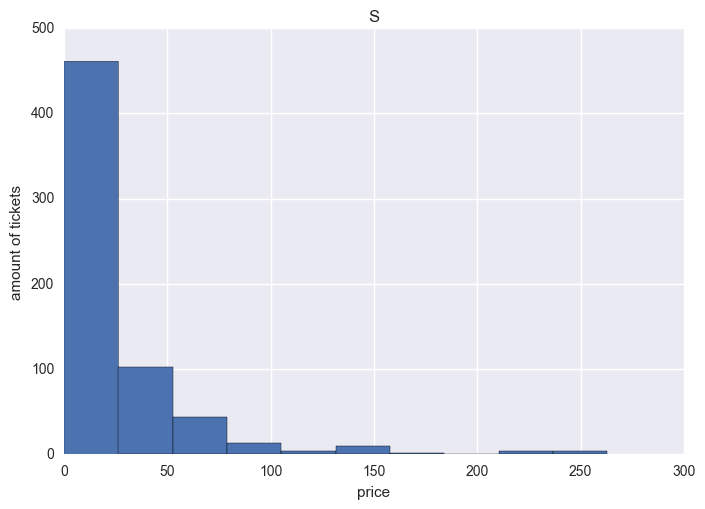

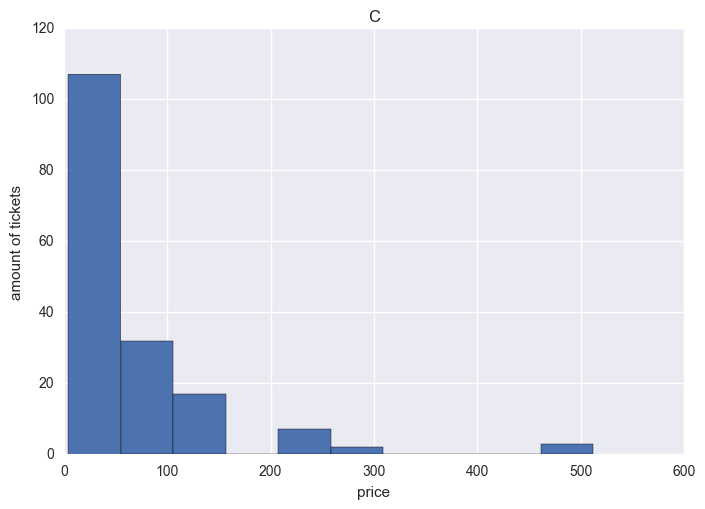

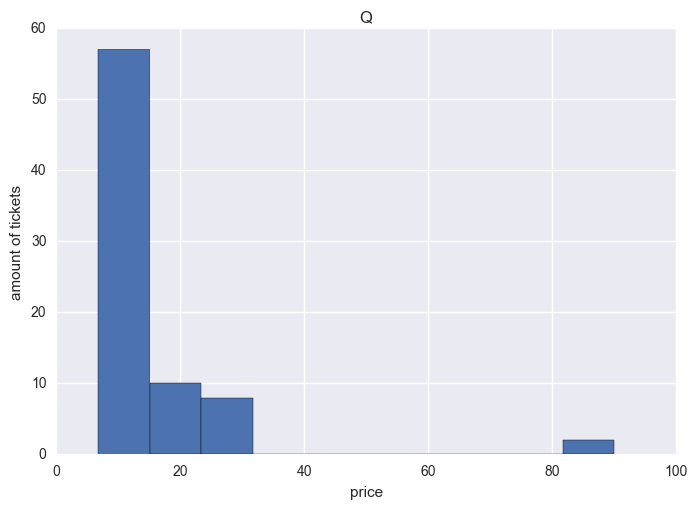

In [45]:
#4
a = titan.sort_values(by = 'Fare').reset_index(drop = True)
names = a.Embarked.dropna().unique()
for key in names:
    a[a.Embarked == key].Fare.dropna().hist(bins = 10)
    plt.xlabel('price')
    plt.ylabel('amount of tickets')
    plt.title(key)
    plt.show()

From these plots we can derive that there are the cheapest tickets from Queenstown and also there are not so many people that have come on board at this town.

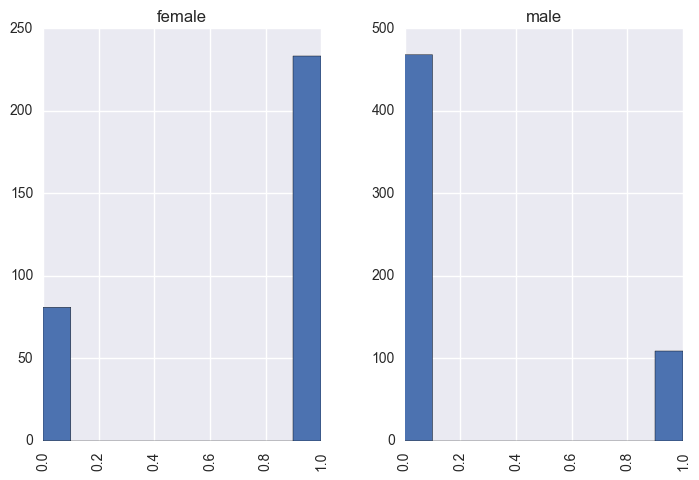

In [46]:
#5 Women survived more frequently than men
titan.hist(column = 'Survived', by = 'Sex')
plt.show()
#True

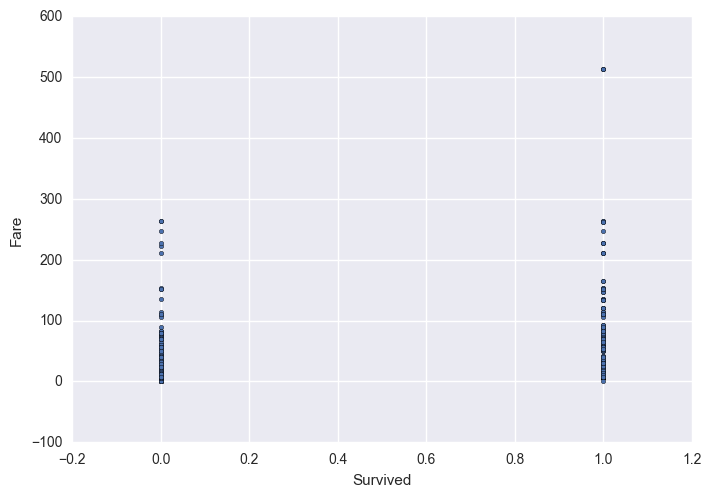

In [11]:
# 5) Passengers with more expensive tickets survived with higher probability
titan.plot.scatter('Survived', 'Fare', s = 10)
plt.show()
#False

In [7]:
a = titan[(titan.Survived == 1) & (titan.Age >= 18) & (titan.Age < 45)].Age.count()
b = titan[(titan.Survived == 1) & (titan.Age < 18)].Age.count()
#a, b

(186, 61)

There are almost 3 times less survived children than middle-aged people

In [28]:
titan[titan.Survived == 1].groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,100120,233,447,5683.00,120,120,12101.6876
male,51854,109,220,2536.67,42,39,4449.5418


Survived women have 3 times more people than men in columns SibSb and Parch.

In [10]:
titan[(titan.Survived == 1) & (titan.Fare > 300)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


There are only 3 persons with very expensive tickets (512.3292) and all of them survived. The observation is derived scatter plot, which is a couple of cells above.

I've cut the Fare column into groups of round prices (for example, prices between 5 and 15 are counted as 10, and prices between 110 and 130 are counted as 120), and then calculated a percentage of survived people in each group, which is 100% * (amount of survived)/ (amount of bought tickets). And as we can see from that plot, that there is no inclination for an assumption that with higher prices come better chances of survival.

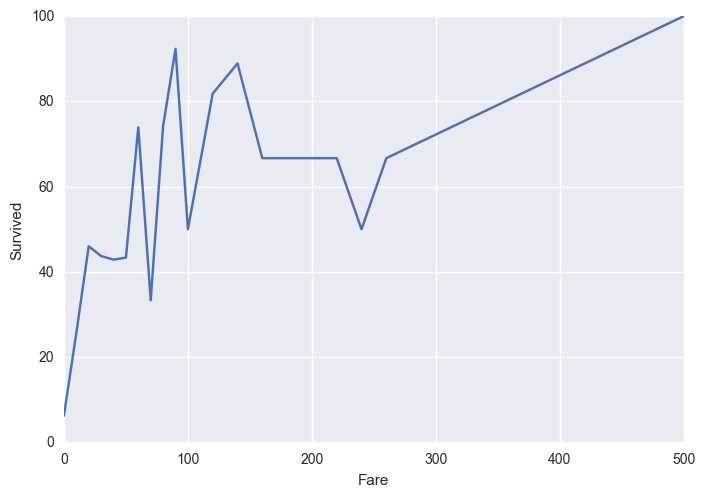

In [20]:
titan1.loc[(105 <= titan1.Fare) & (titan1.Fare < 110), 'Fare'] = 100
titan1.loc[titan1.Fare >= 310, 'Fare'] = 500
titan1.loc[titan1.Fare < 5, 'Fare'] = 0
for i in range(0,10):
   titan1.loc[(5+10*i <= titan1.Fare) & (titan1.Fare < 15 +10*i), 'Fare'] = 10*(i+1)
   titan1.loc[(110+20*i <= titan1.Fare) & (titan1.Fare < 130 +20*i), 'Fare'] = 120 + 20*i
titan2.Fare = titan1.Fare    
b = titan2.groupby('Fare').Survived.sum()
c = titan2.groupby('Fare').Survived.count()
b = 100*b/c
b.plot()
plt.ylabel('Survived')
plt.show()    

I've drawn the ticket costs for every class, from which we can see, that first class tickets are almost always more expensive,  than the rest, from which we can try to derive our method by counting the percentage of survived people for every class, which I intend to do in the next cell

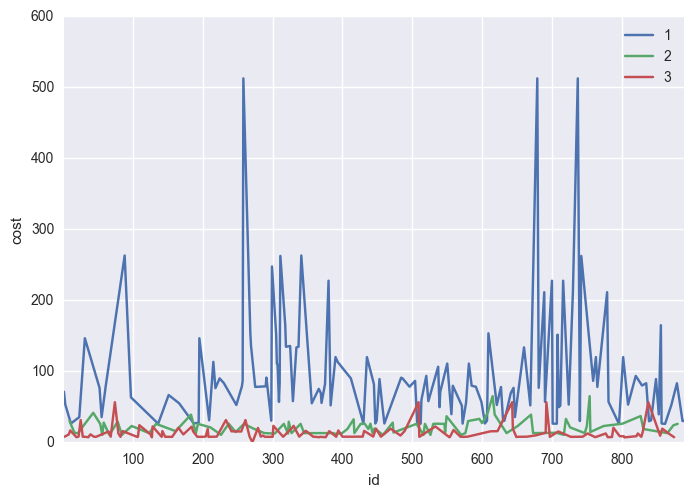

In [19]:
titan[titan.Survived == 1].groupby('Pclass').Fare.plot()
plt.xlabel('id')
plt.ylabel('cost')
plt.legend(loc='upper right')
plt.show()

The most expensive for the first class and the cheapest for the third. So from this plot it is obvious, that people with more expensive costs survived with a higher probability.

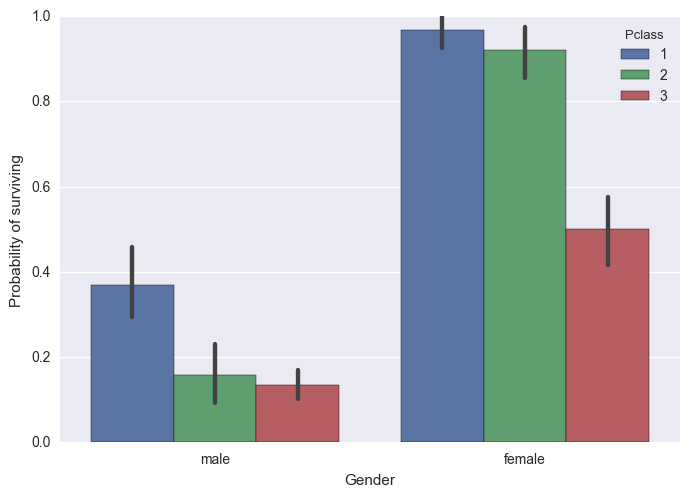

In [58]:
sns.barplot(x = 'Sex', y = 'Survived', hue= 'Pclass', data = titan)
plt.xlabel('Gender')
plt.ylabel('Probability of surviving')
plt.show()